## 股价逆势上涨统计分析

### 获取50支股票信息

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
df = pd.read_csv('./all_data_SS.csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,code
0,0,2015-01-05,10.62,10.75,10.45,10.72,9.667154,3463640,603123.SS
1,1,2015-01-06,10.69,10.96,10.61,10.93,9.856529,4012423,603123.SS
2,2,2015-01-07,10.93,11.28,10.88,11.10,10.009835,8915392,603123.SS
3,3,2015-01-08,11.10,11.10,10.85,10.90,9.829476,4669472,603123.SS
4,4,2015-01-09,10.80,11.23,10.73,10.84,9.775370,6348491,603123.SS
...,...,...,...,...,...,...,...,...,...
190785,190785,2024-08-26,4.25,4.26,4.03,4.10,4.100000,4895240,605006.SS
190786,190786,2024-08-27,4.05,4.06,3.91,3.94,3.940000,3126540,605006.SS
190787,190787,2024-08-28,3.91,4.04,3.91,3.95,3.950000,2884462,605006.SS
190788,190788,2024-08-29,3.95,4.03,3.93,4.01,4.010000,1280940,605006.SS


In [4]:
# 过滤掉code列中以'300'、'688'、‘8’开头的股票
df = df[~df['code'].str.startswith('300')]
df = df[~df['code'].str.startswith('688')]
df = df[~df['code'].str.startswith('8')]
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,code
0,0,2015-01-05,10.62,10.75,10.45,10.72,9.667154,3463640,603123.SS
1,1,2015-01-06,10.69,10.96,10.61,10.93,9.856529,4012423,603123.SS
2,2,2015-01-07,10.93,11.28,10.88,11.10,10.009835,8915392,603123.SS
3,3,2015-01-08,11.10,11.10,10.85,10.90,9.829476,4669472,603123.SS
4,4,2015-01-09,10.80,11.23,10.73,10.84,9.775370,6348491,603123.SS
...,...,...,...,...,...,...,...,...,...
190785,190785,2024-08-26,4.25,4.26,4.03,4.10,4.100000,4895240,605006.SS
190786,190786,2024-08-27,4.05,4.06,3.91,3.94,3.940000,3126540,605006.SS
190787,190787,2024-08-28,3.91,4.04,3.91,3.95,3.950000,2884462,605006.SS
190788,190788,2024-08-29,3.95,4.03,3.93,4.01,4.010000,1280940,605006.SS


### 获取上证指数

In [5]:
df_szzs = pd.read_csv('000001.csv')
df_szzs.set_index('code', inplace=True)
# 计算每只股票的当日涨幅
df_szzs['Pct_Chg_szzs'] = df_szzs.groupby(level=0)['Close'].pct_change()
# 将涨幅数据转换为百分比形式
df_szzs['Pct_Chg_szzs'] *= 100
# 去除Pct_Chg为空的值
df_szzs = df_szzs.dropna(subset=['Pct_Chg_szzs'])

df_szzs

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg_szzs
code,,,,,,,,
000001.SS,2015-01-06,3330.799072,3394.224121,3303.184082,3351.446045,3351.446045,501700,0.027667
000001.SS,2015-01-07,3326.648926,3374.895996,3312.210938,3373.954102,3373.954102,391900,0.671592
000001.SS,2015-01-08,3371.957031,3381.565918,3285.094971,3293.456055,3293.456055,371100,-2.385867
000001.SS,2015-01-09,3276.965088,3404.833984,3267.509033,3285.412109,3285.412109,410200,-0.244240
000001.SS,2015-01-12,3258.212891,3275.185059,3191.582031,3229.315918,3229.315918,322100,-1.707432
...,...,...,...,...,...,...,...,...
000001.SS,2024-08-26,2855.474121,2860.655029,2844.383057,2855.520020,2855.520020,227400,0.040363
000001.SS,2024-08-27,2850.876953,2853.780029,2843.157959,2848.730957,2848.730957,230700,-0.237752
000001.SS,2024-08-28,2844.326904,2852.562012,2830.961914,2837.428955,2837.428955,228700,-0.396738


### 计算股票当日、3日、5日、10日、20日涨幅

In [6]:
df.set_index('code', inplace=True)
# 计算每只股票的当日涨幅
df['Pct_Chg'] = df.groupby(level=0)['Close'].pct_change()
# 计算3天后涨幅
df['Pct_Chg_3d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-3) /x ) - 1) * 100
# 计算5天后涨幅
df['Pct_Chg_5d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-5) /x ) - 1) * 100
# 计算10天后涨幅
df['Pct_Chg_10d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-10) /x ) - 1) * 100
# 计算20天后涨幅
df['Pct_Chg_20d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-20) /x ) - 1) * 100
# 将涨幅数据转换为百分比形式
df['Pct_Chg'] *= 100
# 去除Pct_Chg为空的值
df = df.dropna(subset=['Pct_Chg','Pct_Chg_3d_later', 'Pct_Chg_5d_later', 'Pct_Chg_10d_later', 'Pct_Chg_20d_later'])
df

C:\Users\PC\AppData\Local\Temp\ipykernel_2180\404313188.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Pct_Chg_3d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-3) /x ) - 1) * 100
C:\Users\PC\AppData\Local\Temp\ipykernel_2180\404313188.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., 

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later
code,,,,,,,,,,,,,
603123.SS,1,2015-01-06,10.69,10.96,10.61,10.93,9.856529,4012423,1.958956,-0.823423,-2.195798,-4.940530,-4.300094
603123.SS,2,2015-01-07,10.93,11.28,10.88,11.10,10.009835,8915392,1.555353,-3.783784,-6.576581,-4.774781,-6.666673
603123.SS,3,2015-01-08,11.10,11.10,10.85,10.90,9.829476,4669472,-1.801809,-1.926606,-4.678893,-2.293578,-5.504582
603123.SS,4,2015-01-09,10.80,11.23,10.73,10.84,9.775370,6348491,-0.550454,-4.335796,-2.952027,-4.335796,-4.612546
603123.SS,5,2015-01-12,10.78,10.86,10.61,10.68,9.631083,4311932,-1.476013,-2.715355,-5.524346,-1.217230,-4.588022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605006.SS,190765,2024-07-29,4.09,4.14,4.05,4.08,4.080000,1587780,-1.210658,3.921565,2.941174,3.186277,0.490196
605006.SS,190766,2024-07-30,4.09,4.16,4.04,4.15,4.150000,1736500,1.715691,2.168667,2.409636,2.409636,-5.060242
605006.SS,190767,2024-07-31,4.14,4.29,4.13,4.29,4.290000,1914940,3.373491,-2.097906,-1.398600,-2.097906,-7.925406


### 合并个股和上证指数

In [7]:
# 重置索引，以便合并
df = df.reset_index()
df_szzs = df_szzs.reset_index()
# 合并两个DataFrame
# 这里我们按照'Date'列进行合并，并且使用左连接，这样只会保留df中的日期
df = df.merge(df_szzs[['Date', 'Pct_Chg_szzs']], on='Date', how='left')
df

,code,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later,Pct_Chg_szzs
0,603123.SS,1,2015-01-06,10.69,10.96,10.61,10.93,9.856529,4012423,1.958956,-0.823423,-2.195798,-4.940530,-4.300094,0.027667
1,603123.SS,2,2015-01-07,10.93,11.28,10.88,11.10,10.009835,8915392,1.555353,-3.783784,-6.576581,-4.774781,-6.666673,0.671592
2,603123.SS,3,2015-01-08,11.10,11.10,10.85,10.90,9.829476,4669472,-1.801809,-1.926606,-4.678893,-2.293578,-5.504582,-2.385867
3,603123.SS,4,2015-01-09,10.80,11.23,10.73,10.84,9.775370,6348491,-0.550454,-4.335796,-2.952027,-4.335796,-4.612546,-0.244240
4,603123.SS,5,2015-01-12,10.78,10.86,10.61,10.68,9.631083,4311932,-1.476013,-2.715355,-5.524346,-1.217230,-4.588022,-1.707432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182927,605006.SS,190765,2024-07-29,4.09,4.14,4.05,4.08,4.080000,1587780,-1.210658,3.921565,2.941174,3.186277,0.490196,0.032793
182928,605006.SS,190766,2024-07-30,4.09,4.16,4.04,4.15,4.150000,1736500,1.715691,2.168667,2.409636,2.409636,-5.060242,-0.433803
182929,605006.SS,190767,2024-07-31,4.14,4.29,4.13,4.29,4.290000,1914940,3.373491,-2.097906,-1.398600,-2.097906,-7.925406,2.064702
182930,605006.SS,190768,2024-08-01,4.30,4.33,4.21,4.24,4.240000,1714160,-1.165506,0.235854,0.707552,0.235854,-5.424518,-0.216489


### 区分大盘涨幅和个股涨幅

In [8]:
# 添加大盘涨跌情况的列
df['Market_Trend'] = np.where(df['Pct_Chg_szzs'] > 0, 'Up', 'Down')

In [9]:
# 大盘上涨时的数据
up_market = df[df['Market_Trend'] == 'Up']

# 大盘下跌时的数据
down_market = df[df['Market_Trend'] == 'Down']

# 顺势上涨的股票
up_market_inverse_rise = up_market[up_market['Pct_Chg'] > 0]
# 逆势上涨的股票
down_market_inverse_rise = down_market[down_market['Pct_Chg'] > 0]

# 顺势涨停的股票
up_market_limit_up = up_market[up_market['Pct_Chg'] >= 9.8]
# 逆势涨停的股票
down_market_limit_up = down_market[down_market['Pct_Chg'] >= 9.8]

In [10]:
# 计算平均收益率
def average_returns(df, days):
    return df[f'Pct_Chg_{days}d_later'].mean()

In [11]:
# 大盘上涨时的顺势上涨股票收益
up_market_inverse_rise_avg_3d = average_returns(up_market_inverse_rise, 3)
up_market_inverse_rise_avg_5d = average_returns(up_market_inverse_rise, 5)
up_market_inverse_rise_avg_10d = average_returns(up_market_inverse_rise, 10)
up_market_inverse_rise_avg_20d = average_returns(up_market_inverse_rise, 20)

# 大盘下跌时的逆势上涨股票收益
down_market_inverse_rise_avg_3d = average_returns(down_market_inverse_rise, 3)
down_market_inverse_rise_avg_5d = average_returns(down_market_inverse_rise, 5)
down_market_inverse_rise_avg_10d = average_returns(down_market_inverse_rise, 10)
down_market_inverse_rise_avg_20d = average_returns(down_market_inverse_rise, 20)

# 大盘上涨时的涨停股票收益
up_market_limit_up_avg_3d = average_returns(up_market_limit_up, 3)
up_market_limit_up_avg_5d = average_returns(up_market_limit_up, 5)
up_market_limit_up_avg_10d = average_returns(up_market_limit_up, 10)
up_market_limit_up_avg_20d = average_returns(up_market_limit_up, 20)

# 大盘下跌时的涨停股票收益
down_market_limit_up_avg_3d = average_returns(down_market_limit_up, 3)
down_market_limit_up_avg_5d = average_returns(down_market_limit_up, 5)
down_market_limit_up_avg_10d = average_returns(down_market_limit_up, 10)
down_market_limit_up_avg_20d = average_returns(down_market_limit_up, 20)

#### 2015-01-01 到 2024-08-30 的数据，共182932条

In [12]:
print(f"大盘上涨时逆势上涨股票在未来3天的平均收益率: {up_market_inverse_rise_avg_3d}")
print(f"大盘下跌时逆势上涨股票在未来3天的平均收益率: {down_market_inverse_rise_avg_3d}")
print(f"大盘上涨时逆势涨停股票在未来3天的平均收益率: {up_market_limit_up_avg_3d}")
print(f"大盘下跌时逆势涨停股票在未来3天的平均收益率: {down_market_limit_up_avg_3d}")

print(f"大盘上涨时逆势上涨股票在未来5天的平均收益率: {up_market_inverse_rise_avg_5d}")
print(f"大盘下跌时逆势上涨股票在未来5天的平均收益率: {down_market_inverse_rise_avg_5d}")
print(f"大盘上涨时逆势涨停股票在未来5天的平均收益率: {up_market_limit_up_avg_5d}")
print(f"大盘下跌时逆势涨停股票在未来5天的平均收益率: {down_market_limit_up_avg_5d}")

print(f"大盘上涨时逆势上涨股票在未来10天的平均收益率: {up_market_inverse_rise_avg_10d}")
print(f"大盘下跌时逆势上涨股票在未来10天的平均收益率: {down_market_inverse_rise_avg_10d}")
print(f"大盘上涨时逆势涨停股票在未来10天的平均收益率: {up_market_limit_up_avg_10d}")
print(f"大盘下跌时逆势涨停股票在未来10天的平均收益率: {down_market_limit_up_avg_10d}")

print(f"大盘上涨时逆势上涨股票在未来20天的平均收益率: {up_market_inverse_rise_avg_20d}")
print(f"大盘下跌时逆势上涨股票在未来20天的平均收益率: {down_market_inverse_rise_avg_20d}")
print(f"大盘上涨时逆势涨停股票在未来20天的平均收益率: {up_market_limit_up_avg_20d}")
print(f"大盘下跌时逆势涨停股票在未来20天的平均收益率: {down_market_limit_up_avg_20d}")

大盘上涨时逆势上涨股票在未来3天的平均收益率: 0.35213742536259607
大盘下跌时逆势上涨股票在未来3天的平均收益率: 0.09285844709892838
大盘上涨时逆势涨停股票在未来3天的平均收益率: 3.8997850276822343
大盘下跌时逆势涨停股票在未来3天的平均收益率: 3.048081458690463
大盘上涨时逆势上涨股票在未来5天的平均收益率: 0.4083830887035218
大盘下跌时逆势上涨股票在未来5天的平均收益率: 0.12341530515943888
大盘上涨时逆势涨停股票在未来5天的平均收益率: 4.543630531677415
大盘下跌时逆势涨停股票在未来5天的平均收益率: 3.9805677215566844
大盘上涨时逆势上涨股票在未来10天的平均收益率: 0.5527818295100122
大盘下跌时逆势上涨股票在未来10天的平均收益率: 0.25267412600549277
大盘上涨时逆势涨停股票在未来10天的平均收益率: 5.490006664994589
大盘下跌时逆势涨停股票在未来10天的平均收益率: 4.558327858132849
大盘上涨时逆势上涨股票在未来20天的平均收益率: 1.034047462645782
大盘下跌时逆势上涨股票在未来20天的平均收益率: -0.00028716695568172077
大盘上涨时逆势涨停股票在未来20天的平均收益率: 4.7665547806258
大盘下跌时逆势涨停股票在未来20天的平均收益率: 2.940275321506686


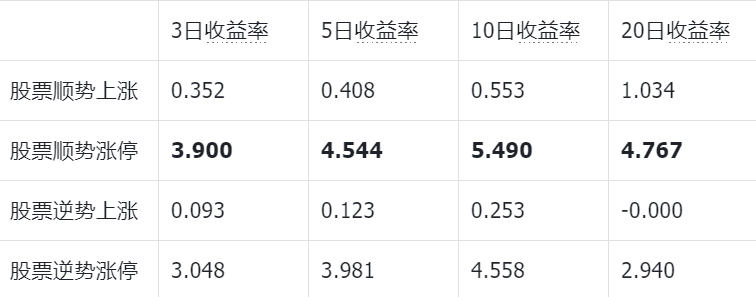

#### 2023-01-01 到 2024-08-30 的数据，共35333条

In [13]:
# 确保日期列是日期类型
df['Date'] = pd.to_datetime(df['Date'])
# 筛选出2023年1月1日之后的数据
df = df[df['Date'] > '2023-01-01']
df

,code,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later,Pct_Chg_szzs,Market_Trend
1935,603123.SS,1936,2023-01-03,13.96,15.30,13.78,15.00,15.00,67821814,5.708248,-5.333335,-8.400002,-16.666667,-10.199998,0.882088,Up
1936,603123.SS,1937,2023-01-04,14.89,14.95,14.35,14.41,14.41,52774265,-3.933334,-0.763356,-5.135321,-13.115888,-10.409438,0.224931,Up
1937,603123.SS,1938,2023-01-05,14.70,15.58,14.50,15.07,15.07,88029283,4.580152,-8.825481,-15.262105,-17.120106,-13.005973,1.014879,Up
1938,603123.SS,1939,2023-01-06,14.69,14.80,14.14,14.20,14.20,58946291,-5.773058,-3.732393,-10.211266,-10.140842,-7.746475,0.076696,Up
1939,603123.SS,1940,2023-01-09,14.11,14.85,13.95,14.30,14.30,43870935,0.704228,-10.699299,-10.139859,-9.650350,-8.111887,0.583986,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182927,605006.SS,190765,2024-07-29,4.09,4.14,4.05,4.08,4.08,1587780,-1.210658,3.921565,2.941174,3.186277,0.490196,0.032793,Up
182928,605006.SS,190766,2024-07-30,4.09,4.16,4.04,4.15,4.15,1736500,1.715691,2.168667,2.409636,2.409636,-5.060242,-0.433803,Down
182929,605006.SS,190767,2024-07-31,4.14,4.29,4.13,4.29,4.29,1914940,3.373491,-2.097906,-1.398600,-2.097906,-7.925406,2.064702,Up
182930,605006.SS,190768,2024-08-01,4.30,4.33,4.21,4.24,4.24,1714160,-1.165506,0.235854,0.707552,0.235854,-5.424518,-0.216489,Down


In [14]:
# 大盘上涨时的数据
up_market = df[df['Market_Trend'] == 'Up']

# 大盘下跌时的数据
down_market = df[df['Market_Trend'] == 'Down']

# 逆势上涨的股票
up_market_inverse_rise = up_market[up_market['Pct_Chg'] > 0]
down_market_inverse_rise = down_market[down_market['Pct_Chg'] > 0]

# 逆势涨停的股票
up_market_limit_up = up_market[up_market['Pct_Chg'] >= 9.8]
down_market_limit_up = down_market[down_market['Pct_Chg'] >= 9.8]

In [15]:
# 大盘上涨时的顺势上涨股票收益
up_market_inverse_rise_avg_3d = average_returns(up_market_inverse_rise, 3)
up_market_inverse_rise_avg_5d = average_returns(up_market_inverse_rise, 5)
up_market_inverse_rise_avg_10d = average_returns(up_market_inverse_rise, 10)
up_market_inverse_rise_avg_20d = average_returns(up_market_inverse_rise, 20)

# 大盘下跌时的逆势上涨股票收益
down_market_inverse_rise_avg_3d = average_returns(down_market_inverse_rise, 3)
down_market_inverse_rise_avg_5d = average_returns(down_market_inverse_rise, 5)
down_market_inverse_rise_avg_10d = average_returns(down_market_inverse_rise, 10)
down_market_inverse_rise_avg_20d = average_returns(down_market_inverse_rise, 20)

# 大盘上涨时的涨停股票收益
up_market_limit_up_avg_3d = average_returns(up_market_limit_up, 3)
up_market_limit_up_avg_5d = average_returns(up_market_limit_up, 5)
up_market_limit_up_avg_10d = average_returns(up_market_limit_up, 10)
up_market_limit_up_avg_20d = average_returns(up_market_limit_up, 20)

# 大盘下跌时的涨停股票收益
down_market_limit_up_avg_3d = average_returns(down_market_limit_up, 3)
down_market_limit_up_avg_5d = average_returns(down_market_limit_up, 5)
down_market_limit_up_avg_10d = average_returns(down_market_limit_up, 10)
down_market_limit_up_avg_20d = average_returns(down_market_limit_up, 20)

In [16]:
print(f"大盘上涨时顺势上涨股票在未来3天的平均收益率: {up_market_inverse_rise_avg_3d}")
print(f"大盘下跌时逆势上涨股票在未来3天的平均收益率: {down_market_inverse_rise_avg_3d}")
print(f"大盘上涨时顺势涨停股票在未来3天的平均收益率: {up_market_limit_up_avg_3d}")
print(f"大盘下跌时逆势涨停股票在未来3天的平均收益率: {down_market_limit_up_avg_3d}")

大盘上涨时顺势上涨股票在未来3天的平均收益率: 0.4387406001933835
大盘下跌时逆势上涨股票在未来3天的平均收益率: -0.03853068500330809
大盘上涨时顺势涨停股票在未来3天的平均收益率: 3.7946257909657146
大盘下跌时逆势涨停股票在未来3天的平均收益率: 1.6540151481272534


In [17]:
print(f"大盘上涨时逆势上涨股票在未来5天的平均收益率: {up_market_inverse_rise_avg_5d}")
print(f"大盘下跌时逆势上涨股票在未来5天的平均收益率: {down_market_inverse_rise_avg_5d}")
print(f"大盘上涨时逆势涨停股票在未来5天的平均收益率: {up_market_limit_up_avg_5d}")
print(f"大盘下跌时逆势涨停股票在未来5天的平均收益率: {down_market_limit_up_avg_5d}")

大盘上涨时逆势上涨股票在未来5天的平均收益率: 0.21808149481730058
大盘下跌时逆势上涨股票在未来5天的平均收益率: 0.07562721664048455
大盘上涨时逆势涨停股票在未来5天的平均收益率: 3.271833733084854
大盘下跌时逆势涨停股票在未来5天的平均收益率: 0.4406132529770752


In [18]:
print(f"大盘上涨时逆势上涨股票在未来10天的平均收益率: {up_market_inverse_rise_avg_10d}")
print(f"大盘下跌时逆势上涨股票在未来10天的平均收益率: {down_market_inverse_rise_avg_10d}")
print(f"大盘上涨时逆势涨停股票在未来10天的平均收益率: {up_market_limit_up_avg_10d}")
print(f"大盘下跌时逆势涨停股票在未来10天的平均收益率: {down_market_limit_up_avg_10d}")

大盘上涨时逆势上涨股票在未来10天的平均收益率: 0.05047995321887903
大盘下跌时逆势上涨股票在未来10天的平均收益率: -0.278555123707969
大盘上涨时逆势涨停股票在未来10天的平均收益率: 2.5145425159156276
大盘下跌时逆势涨停股票在未来10天的平均收益率: -1.6230539870754639


In [19]:
print(f"大盘上涨时逆势上涨股票在未来20天的平均收益率: {up_market_inverse_rise_avg_20d}")
print(f"大盘下跌时逆势上涨股票在未来20天的平均收益率: {down_market_inverse_rise_avg_20d}")
print(f"大盘上涨时逆势涨停股票在未来20天的平均收益率: {up_market_limit_up_avg_20d}")
print(f"大盘下跌时逆势涨停股票在未来20天的平均收益率: {down_market_limit_up_avg_20d}")

大盘上涨时逆势上涨股票在未来20天的平均收益率: 0.19499198661089032
大盘下跌时逆势上涨股票在未来20天的平均收益率: -0.8184966577443181
大盘上涨时逆势涨停股票在未来20天的平均收益率: 0.21101252212790633
大盘下跌时逆势涨停股票在未来20天的平均收益率: -4.904574636948768


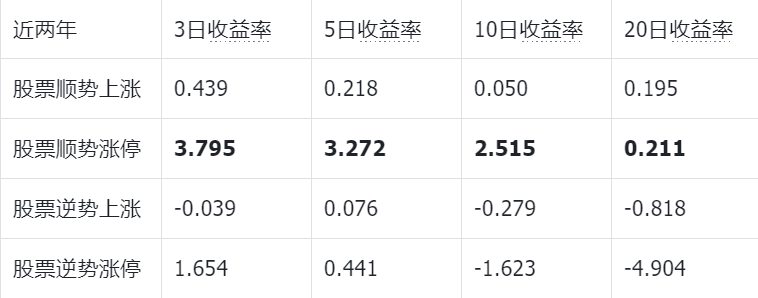

#### 一、涨停股票短期内收益明显高于非涨停股票，具有较强的短期收益波动性


#### 二、非涨停股票的收益在大盘下跌时受到较大影响，尤其是逆势上涨的股票表现非常不理想。

## 机器学习对股价进行预测

#### 堆叠模型

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

In [21]:
def stacking_model(df, x_target):
    target = x_target
    features = ['Pct_Chg', 'Pct_Chg_szzs']
    
    x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], random_state=2, test_size=0.2)
    
    transformer = StandardScaler()
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    # 初始化五个基础模型
    model1 = DecisionTreeRegressor(random_state=2, max_depth=10, min_samples_split=10)
    model2 = RandomForestRegressor(random_state=2, n_estimators=300, max_depth=10, min_samples_split=10)
    model3 = SVR(kernel='rbf', C=1.5, epsilon=0.05)
    model4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
    model5 = AdaBoostRegressor(n_estimators=100, random_state=2)
    
    # 训练基础模型
    model1.fit(x_train, y_train)
    model2.fit(x_train, y_train)
    model3.fit(x_train, y_train)
    model4.fit(x_train, y_train)
    model5.fit(x_train, y_train)
    
    # 获取基础模型的预测结果
    pred1 = model1.predict(x_test)
    pred2 = model2.predict(x_test)
    pred3 = model3.predict(x_test)
    pred4 = model4.predict(x_test)
    pred5 = model5.predict(x_test)
    
    # 将预测结果堆叠成新的特征
    stacked_predictions = np.column_stack((pred1, pred2, pred3, pred4, pred5))
    
    # 使用XGBoost作为元模型
    meta_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=2)
    meta_model.fit(stacked_predictions, y_test)
    
    # 预测并评估
    final_predictions = meta_model.predict(stacked_predictions)
    print(f"最终预测值为：{final_predictions}")
    print(f"均方误差为：{mean_squared_error(y_test, final_predictions)}")

    return None

In [22]:
# 示例调用
x_target = 'Pct_Chg_3d_later'
stacking_model(df, x_target)

最终预测值为：[ 1.1052219   3.832469   -1.3254853  ... -0.46397603 -0.32878575
 -0.04300319]
均方误差为：18.80511590274268


#### LSTM模型

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [24]:
def lstm_model(df, x_target):
    target = x_target
    features = ['Pct_Chg', 'Pct_Chg_szzs']
    
    # 分割数据集
    x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], random_state=2, test_size=0.2)
    
    # 特征标准化
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # LSTM 输入需要三维形状 (样本数, 时间步长, 特征数)
    x_train_lstm = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
    x_test_lstm = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
    
    # 初始化 LSTM 模型
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # 训练 LSTM 模型
    model.fit(x_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
    
    # 获取预测结果
    final_predictions = model.predict(x_test_lstm)
    
    # 评估模型
    mse = mean_squared_error(y_test, final_predictions)
    print(f"最终预测值为：{final_predictions.flatten()}")
    print(f"均方误差为：{mse}")

    return None

In [25]:
x_target = 'Pct_Chg_3d_later'
lstm_model(df, x_target)

221/221 [==============================] - 0s 595us/step
最终预测值为：[-0.10837063  0.81214285  0.23379353 ... -0.6089144  -0.3332077
  0.02666042]
均方误差为：28.17477879378581
